In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date']= pd.to_datetime(df['job_posted_date'])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [2]:
df_india = df[df['job_country']== 'India'].copy()

In [3]:
df_india

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,"['powershell', 'python', 'sql', 'mysql', 'sql ...","{'cloud': ['databricks', 'azure'], 'databases'..."
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"['r', 'sql', 'python', 'scala', 'java', 'c++',...","{'analyst_tools': ['tableau'], 'libraries': ['..."
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","['sql', 'python', 'databricks', 'power bi', 'e...","{'analyst_tools': ['power bi', 'excel', 'word'..."
42,Senior Data Engineer,"Senior Data Engineer(Python)-1563,1637&1633","Chennai, Tamil Nadu, India",via HR Software For Growing Businesses | Fresh...,Full-time,False,India,2023-11-10 13:30:41,True,False,India,None,NaN,NaN,CESIT,"['python', 'sql', 'aws', 'pyspark', 'docker', ...","{'async': ['jira'], 'cloud': ['aws'], 'librari..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785712,Data Engineer,India - Collections Analyst II,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Varite India Private Limited,"['excel', 'flow']","{'analyst_tools': ['excel'], 'other': ['flow']}"
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,"['c#', 'sql']","{'programming': ['c#', 'sql']}"
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Diebold Nixdorf,None,None


In [4]:
df_india['job_posted_month'] = df_india['job_posted_date'].dt.strftime('%B')

df_india['job_posted_month']

,job_posted_month
16,June
19,April
29,March
38,July
42,November
...,...
785712,March
785715,March
785716,March
785718,March


In [5]:
df_india_pivot = df_india.pivot_table(index = 'job_posted_month', columns= 'job_title_short',aggfunc='size')



In [6]:
df_india_pivot.reset_index(inplace = True)

In [7]:
df_india_pivot['month_number'] = pd.to_datetime( df_india_pivot['job_posted_month'], format = '%B').dt.month

In [8]:
df_india_pivot['month_number']

,month_number
0,4
1,8
2,12
3,2
4,1
5,7
6,6
7,3
8,5
9,11


In [9]:
df_india_pivot.sort_values('month_number', inplace= True)
df_india_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_number
4,January,175,31,628,2132,1444,70,127,448,269,192,1
3,February,143,35,433,1631,932,42,94,313,165,157,2
7,March,116,37,422,1591,1005,34,96,351,194,180,3
0,April,170,32,418,1566,946,54,86,375,194,169,4
8,May,103,14,278,1384,837,31,59,329,134,98,5
6,June,146,26,367,1632,1129,41,66,427,238,125,6
5,July,142,25,457,1528,1123,54,75,359,204,155,7
1,August,189,25,618,1407,1157,47,126,343,235,148,8
11,September,155,34,630,1508,984,67,85,324,195,132,9
10,October,170,36,500,1476,902,85,67,318,180,167,10


In [10]:
df_india_pivot.set_index('job_posted_month', inplace= True)


In [11]:
df_india_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_number
job_posted_month,,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192,1
February,143,35,433,1631,932,42,94,313,165,157,2
March,116,37,422,1591,1005,34,96,351,194,180,3
April,170,32,418,1566,946,54,86,375,194,169,4
May,103,14,278,1384,837,31,59,329,134,98,5
June,146,26,367,1632,1129,41,66,427,238,125,6
July,142,25,457,1528,1123,54,75,359,204,155,7
August,189,25,618,1407,1157,47,126,343,235,148,8
September,155,34,630,1508,984,67,85,324,195,132,9


In [12]:

df_india_pivot.drop(columns='month_number', inplace = True)

In [13]:
df_india_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
0,January,175,31,628,2132,1444,70,127,448,269,192
1,February,143,35,433,1631,932,42,94,313,165,157
2,March,116,37,422,1591,1005,34,96,351,194,180
3,April,170,32,418,1566,946,54,86,375,194,169
4,May,103,14,278,1384,837,31,59,329,134,98
5,June,146,26,367,1632,1129,41,66,427,238,125
6,July,142,25,457,1528,1123,54,75,359,204,155
7,August,189,25,618,1407,1157,47,126,343,235,148
8,September,155,34,630,1508,984,67,85,324,195,132
9,October,170,36,500,1476,902,85,67,318,180,167


In [16]:
df_india_pivot.reset_index(inplace=True)
df_india_pivot.set_index('job_posted_month', inplace= True)

KeyError: "None of ['job_posted_month'] are in the columns"

In [15]:
df_india_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192
February,143,35,433,1631,932,42,94,313,165,157
March,116,37,422,1591,1005,34,96,351,194,180
April,170,32,418,1566,946,54,86,375,194,169
May,103,14,278,1384,837,31,59,329,134,98
June,146,26,367,1632,1129,41,66,427,238,125
July,142,25,457,1528,1123,54,75,359,204,155
August,189,25,618,1407,1157,47,126,343,235,148
September,155,34,630,1508,984,67,85,324,195,132


<Axes: xlabel='job_posted_month'>

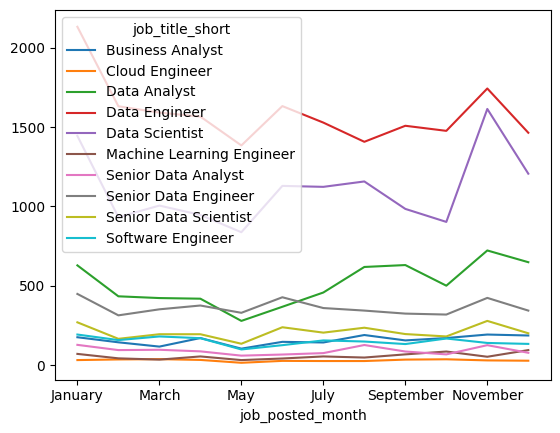

In [17]:
df_india_pivot.plot(kind = 'line')

In [21]:
top3 = df_india['job_title_short'].value_counts().head(3)
top3 = top3.index.tolist()

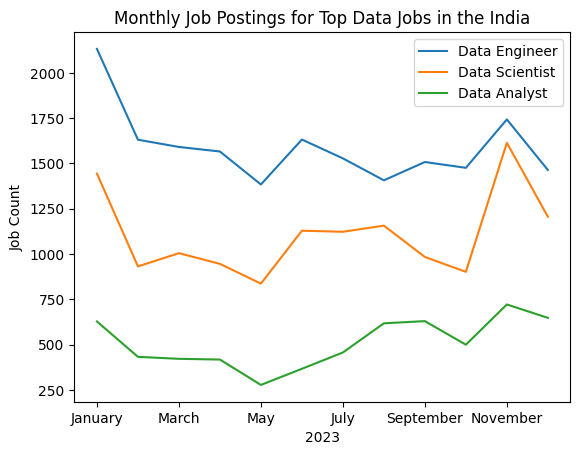

In [25]:
df_india_pivot[top3].plot(kind = 'line')
plt.title('Monthly Job Postings for Top Data Jobs in the India')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()
